In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPRegressor

warnings.filterwarnings('ignore')


In [2]:
!pip install dmba
from dmba import regressionSummary, plotDecisionTree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 33.9 MB/s eta 0:00:00
Colab environment detected.


In [3]:
#Read the Data Set
data = pd.read_csv("Medicare_data.csv", encoding='latin-1')
data.head()

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,1003000738,Zumwalt,Juliette,A,P.A.,F,I,7401 S. Main,NaN,Houston,...,Aspiration and/or injection of large joint or ...,N,O,65,75.0,74,312.000000,62.266400,46.875333,44.976000
1,1003000738,Zumwalt,Juliette,A,P.A.,F,I,7401 S. Main,NaN,Houston,...,Aspiration and/or injection of major joint or ...,N,O,50,56.0,56,453.035714,98.248929,75.074107,71.862857
2,1003000738,Zumwalt,Juliette,A,P.A.,F,I,7401 S. Main,NaN,Houston,...,Extensive removal of abnormal shoulder joint t...,N,F,13,13.0,13,1703.153846,32.933846,26.343077,21.044615
3,1003000738,Zumwalt,Juliette,A,P.A.,F,I,7401 S. Main,NaN,Houston,...,Repair of shoulder rotator cuff using an endos...,N,F,21,21.0,21,3213.214286,148.893810,119.117143,76.564286
4,1003000738,Zumwalt,Juliette,A,P.A.,F,I,7401 S. Main,NaN,Houston,...,"X-ray of shoulder, minimum of 2 views",N,O,24,27.0,25,103.000000,30.460000,24.370000,23.250000


In [4]:
# Describe the data types of the dataset
data.describe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676388 entries, 0 to 676387
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Rndrng_NPI                     676388 non-null  int64  
 1   Rndrng_Prvdr_Last_Org_Name     676388 non-null  object 
 2   Rndrng_Prvdr_First_Name        624540 non-null  object 
 3   Rndrng_Prvdr_MI                445948 non-null  object 
 4   Rndrng_Prvdr_Crdntls           600462 non-null  object 
 5   Rndrng_Prvdr_Gndr              624540 non-null  object 
 6   Rndrng_Prvdr_Ent_Cd            676388 non-null  object 
 7   Rndrng_Prvdr_St1               676388 non-null  object 
 8   Rndrng_Prvdr_St2               190025 non-null  object 
 9   Rndrng_Prvdr_City              676388 non-null  object 
 10  Rndrng_Prvdr_State_Abrvtn      676388 non-null  object 
 11  Rndrng_Prvdr_State_FIPS        676388 non-null  int64  
 12  Rndrng_Prvdr_Zip5             

In [5]:
# Checking missing values or empty values
data.isnull().sum()

Rndrng_NPI                            0
Rndrng_Prvdr_Last_Org_Name            0
Rndrng_Prvdr_First_Name           51848
Rndrng_Prvdr_MI                  230440
Rndrng_Prvdr_Crdntls              75926
Rndrng_Prvdr_Gndr                 51848
Rndrng_Prvdr_Ent_Cd                   0
Rndrng_Prvdr_St1                      0
Rndrng_Prvdr_St2                 486363
Rndrng_Prvdr_City                     0
Rndrng_Prvdr_State_Abrvtn             0
Rndrng_Prvdr_State_FIPS               0
Rndrng_Prvdr_Zip5                     0
Rndrng_Prvdr_RUCA                   219
Rndrng_Prvdr_RUCA_Desc              219
Rndrng_Prvdr_Cntry                    0
Rndrng_Prvdr_Type                     0
Rndrng_Prvdr_Mdcr_Prtcptg_Ind         0
HCPCS_Cd                              0
HCPCS_Desc                            0
HCPCS_Drug_Ind                        0
Place_Of_Srvc                         0
Tot_Benes                             0
Tot_Srvcs                             0
Tot_Bene_Day_Srvcs                    0


In [6]:
# Droping the non required parameters and cleaning the data as per analysis requirement
fraud_data = data.drop(['Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name','Rndrng_Prvdr_MI','Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_State_FIPS',
                         'Rndrng_Prvdr_Zip5','HCPCS_Cd','Place_Of_Srvc','HCPCS_Drug_Ind','Rndrng_Prvdr_St2','Rndrng_Prvdr_Crdntls','Rndrng_Prvdr_Ent_Cd','Rndrng_Prvdr_Gndr','Rndrng_Prvdr_Mdcr_Prtcptg_Ind','HCPCS_Desc','Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry',
                          'Rndrng_Prvdr_Type','Rndrng_Prvdr_St1',], axis=1)

fraud_data_cleaned = fraud_data.dropna()
fraud_data_cleaned.head()

,Rndrng_NPI,Rndrng_Prvdr_RUCA,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,1003000738,1.0,65,75.0,74,312.000000,62.266400,46.875333,44.976000
1,1003000738,1.0,50,56.0,56,453.035714,98.248929,75.074107,71.862857
2,1003000738,1.0,13,13.0,13,1703.153846,32.933846,26.343077,21.044615
3,1003000738,1.0,21,21.0,21,3213.214286,148.893810,119.117143,76.564286
4,1003000738,1.0,24,27.0,25,103.000000,30.460000,24.370000,23.250000


In [7]:
fraud_data_cleaned.isnull().sum() #Checking for null values in the cleaned data

Rndrng_NPI            0
Rndrng_Prvdr_RUCA     0
Tot_Benes             0
Tot_Srvcs             0
Tot_Bene_Day_Srvcs    0
Avg_Sbmtd_Chrg        0
Avg_Mdcr_Alowd_Amt    0
Avg_Mdcr_Pymt_Amt     0
Avg_Mdcr_Stdzd_Amt    0
dtype: int64

In [8]:
# Select columns in the dataframe 'fraud_data_cleaned' that are of numeric type (integers and floats)
numerical_cols = fraud_data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Select columns in the dataframe 'fraud_data_cleaned' that are of categorical type (objects)
categorical_cols = fraud_data_cleaned.select_dtypes(include=['object']).columns

# Display the arrays containing the names of numerical and categorical columns
numerical_cols, categorical_cols

# Convert the 'Tot_Srvcs' column to numeric, coercing errors which replaces non-convertible values with NaN
fraud_data_cleaned['Tot_Srvcs'] = pd.to_numeric(fraud_data_cleaned['Tot_Srvcs'], errors='coerce')

# Remove dollar signs from the 'Avg_Sbmtd_Chrg' column and convert it to float type
fraud_data_cleaned['Avg_Sbmtd_Chrg'] = fraud_data_cleaned['Avg_Sbmtd_Chrg'].replace('[\$,]', '', regex=True).astype(float)

# Remove dollar signs from the 'Avg_Mdcr_Alowd_Amt' column and convert it to float type
fraud_data_cleaned['Avg_Mdcr_Alowd_Amt'] = fraud_data_cleaned['Avg_Mdcr_Alowd_Amt'].replace('[\$,]', '', regex=True).astype(float)

# Remove dollar signs from the 'Avg_Mdcr_Pymt_Amt' column and convert it to float type
fraud_data_cleaned['Avg_Mdcr_Pymt_Amt'] = fraud_data_cleaned['Avg_Mdcr_Pymt_Amt'].replace('[\$,]', '', regex=True).astype(float)

# Remove dollar signs from the 'Avg_Mdcr_Stdzd_Amt' column and convert it to float type
fraud_data_cleaned['Avg_Mdcr_Stdzd_Amt'] = fraud_data_cleaned['Avg_Mdcr_Stdzd_Amt'].replace('[\$,]', '', regex=True).astype(float)

# Display the DataFrame information including the data type of each column, which is useful for debugging and verifying data types after transformations
fraud_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 676169 entries, 0 to 676387
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Rndrng_NPI          676169 non-null  int64  
 1   Rndrng_Prvdr_RUCA   676169 non-null  float64
 2   Tot_Benes           676169 non-null  int64  
 3   Tot_Srvcs           676169 non-null  float64
 4   Tot_Bene_Day_Srvcs  676169 non-null  int64  
 5   Avg_Sbmtd_Chrg      676169 non-null  float64
 6   Avg_Mdcr_Alowd_Amt  676169 non-null  float64
 7   Avg_Mdcr_Pymt_Amt   676169 non-null  float64
 8   Avg_Mdcr_Stdzd_Amt  676169 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 51.6 MB


Class Distribution:
 Avg_Mdcr_Pymt_Amt
38.690000     9149
3.000000      4256
2.250000      2791
40.790000     2285
45.230000     2117
              ... 
22.733077        1
361.529565       1
429.151667       1
7.071570         1
52.427125        1
Name: count, Length: 493638, dtype: int64


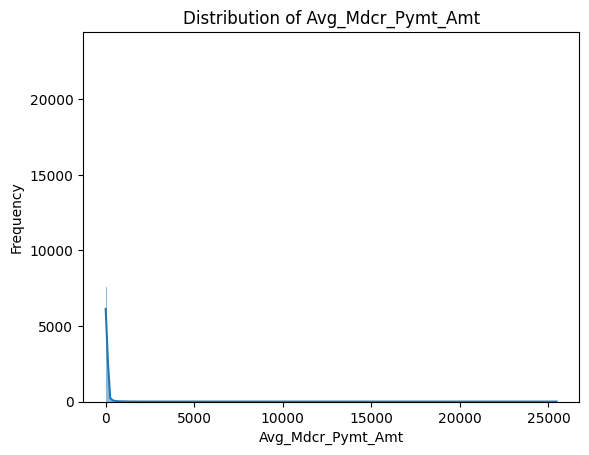

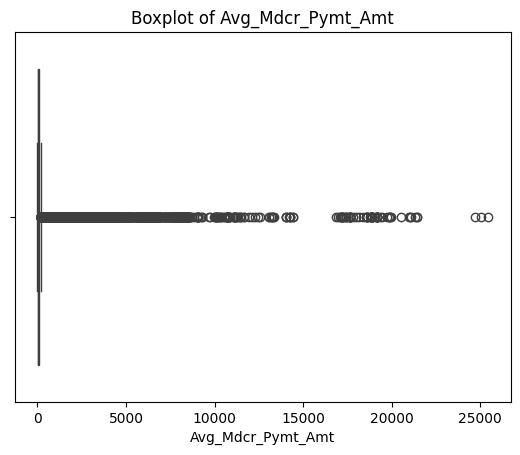

Ratio of minority class to majority class: 0.00
The dataset is highly unbalanced.


In [9]:
class_distribution = fraud_data_cleaned['Avg_Mdcr_Pymt_Amt'].value_counts()
print("Class Distribution:\n", class_distribution)

# Visualize the class distribution
sns.histplot(fraud_data_cleaned['Avg_Mdcr_Pymt_Amt'], kde=True)
plt.title('Distribution of Avg_Mdcr_Pymt_Amt')
plt.xlabel('Avg_Mdcr_Pymt_Amt')
plt.ylabel('Frequency')
plt.show()

# Boxplot to view outliers and spread
sns.boxplot(x=fraud_data_cleaned['Avg_Mdcr_Pymt_Amt'])
plt.title('Boxplot of Avg_Mdcr_Pymt_Amt')
plt.show()

# Calculate the ratio of the smallest class to the largest class
class_ratio = class_distribution.min() / class_distribution.max()
print(f"Ratio of minority class to majority class: {class_ratio:.2f}")

# Output qualitative assessment
if class_ratio > 0.8:
    print("The dataset is very balanced.")
elif class_ratio > 0.5:
    print("The dataset is moderately balanced.")
elif class_ratio > 0.3:
    print("The dataset is somewhat unbalanced.")
else:
    print("The dataset is highly unbalanced.")

In [10]:
# Prepare the feature and target datasets by separating 'Avg_Mdcr_Pymt_Amt'
X = fraud_data_cleaned.drop("Avg_Mdcr_Pymt_Amt", axis=1, inplace=False)
Y = fraud_data_cleaned['Avg_Mdcr_Pymt_Amt']

# Split the data into training and validation sets to evaluate the model's performance
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.2, random_state=1)

# Output the structure of the training and validation datasets to ensure correctness
print(train_X.info())
print()
print(train_Y.info())
print()
print(valid_X.info())
print()
print(valid_Y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 540935 entries, 167370 to 128069
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Rndrng_NPI          540935 non-null  int64  
 1   Rndrng_Prvdr_RUCA   540935 non-null  float64
 2   Tot_Benes           540935 non-null  int64  
 3   Tot_Srvcs           540935 non-null  float64
 4   Tot_Bene_Day_Srvcs  540935 non-null  int64  
 5   Avg_Sbmtd_Chrg      540935 non-null  float64
 6   Avg_Mdcr_Alowd_Amt  540935 non-null  float64
 7   Avg_Mdcr_Stdzd_Amt  540935 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 37.1 MB
None

<class 'pandas.core.series.Series'>
Index: 540935 entries, 167370 to 128069
Series name: Avg_Mdcr_Pymt_Amt
Non-Null Count   Dtype  
--------------   -----  
540935 non-null  float64
dtypes: float64(1)
memory usage: 8.3 MB
None

<class 'pandas.core.frame.DataFrame'>
Index: 135234 entries, 35316 to 457273
Data columns (total 8 column



---



**LINEAR REGRESSION**

---



In [11]:
# Initialize and train a Linear Regression model
LR = LinearRegression()
LR.fit(train_X, train_Y)

# Output the coefficients of each predictor to assess their influence on the target variable
print(pd.DataFrame({
    "Predictor": X.columns,
    "Coefficient": LR.coef_
}))

            Predictor   Coefficient
0          Rndrng_NPI  9.250554e-11
1   Rndrng_Prvdr_RUCA  2.064242e-02
2           Tot_Benes  7.573359e-04
3           Tot_Srvcs  1.645286e-05
4  Tot_Bene_Day_Srvcs -4.403791e-04
5      Avg_Sbmtd_Chrg  5.142497e-06
6  Avg_Mdcr_Alowd_Amt  5.880162e-01
7  Avg_Mdcr_Stdzd_Amt  2.622961e-01


In [12]:
regressionSummary(train_Y, LR.predict(train_X))


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 8.7778
     Mean Absolute Error (MAE) : 4.0923


In [13]:
predicted = LR.predict(valid_X)
print(predicted)

[ 38.62597299  10.41778552  83.15786236 ...  14.90106696   3.24981357
 121.45397709]


In [14]:
result = pd.DataFrame({"Predicted": predicted.round(2),
                       'Actual': valid_Y,
                       "Residual": (valid_Y - predicted).round(2)})

print(result.head(20))

        Predicted      Actual  Residual
35316       38.63   39.135464      0.51
358374      10.42   11.300833      0.88
145651      83.16   72.297931    -10.86
108374       6.32    6.701053      0.38
10352      109.55  128.960000     19.41
375489       8.27   10.500000      2.23
659777      30.27   28.258696     -2.01
443903      78.46   75.814057     -2.65
206221      25.93   25.797108     -0.13
578814      55.57   55.820118      0.25
197728     158.48  158.482647      0.00
634619      82.17   83.190000      1.02
8538        69.60   62.733153     -6.87
305719      68.68   70.066154      1.38
556749     114.57  137.180000     22.61
295624       4.27    5.780000      1.51
32908       68.38   61.564943     -6.81
58765      193.91  193.709195     -0.20
45393      792.16  791.477778     -0.68
156372      13.33   16.530000      3.20


In [15]:
regressionSummary(valid_Y, predicted)


Regression statistics

                      Mean Error (ME) : 0.0085
       Root Mean Squared Error (RMSE) : 9.2708
            Mean Absolute Error (MAE) : 4.1196
          Mean Percentage Error (MPE) : 18.2322
Mean Absolute Percentage Error (MAPE) : 25.7020




---



**REGRESSION TREE**

---



In [16]:
RT = DecisionTreeRegressor()# Initialize and train a Regression Tree model
RT.fit(train_X, train_Y)

DecisionTreeRegressor()

In [17]:
RT_PRED = RT.predict(valid_X)

In [18]:
DF= pd.DataFrame({"Actual": valid_Y,
                    "Predicted": RT_PRED.round(2),
                    "Residual": (valid_Y - RT_PRED).round(2)})

print(DF.head(15))

            Actual  Predicted  Residual
35316    39.135464      39.26     -0.13
358374   11.300833      11.30      0.00
145651   72.297931      71.96      0.34
108374    6.701053       6.69      0.02
10352   128.960000     128.96     -0.00
375489   10.500000      10.50      0.00
659777   28.258696      28.01      0.25
443903   75.814057      69.75      6.06
206221   25.797108      25.62      0.18
578814   55.820118      57.02     -1.20
197728  158.482647     158.76     -0.28
634619   83.190000      76.07      7.12
8538     62.733153      62.76     -0.03
305719   70.066154      69.28      0.79
556749  137.180000     137.18     -0.00


In [19]:
regressionSummary(valid_Y, RT_PRED)


Regression statistics

                      Mean Error (ME) : 0.0127
       Root Mean Squared Error (RMSE) : 5.1134
            Mean Absolute Error (MAE) : 1.4460
          Mean Percentage Error (MPE) : -0.1196
Mean Absolute Percentage Error (MAPE) : 2.1127


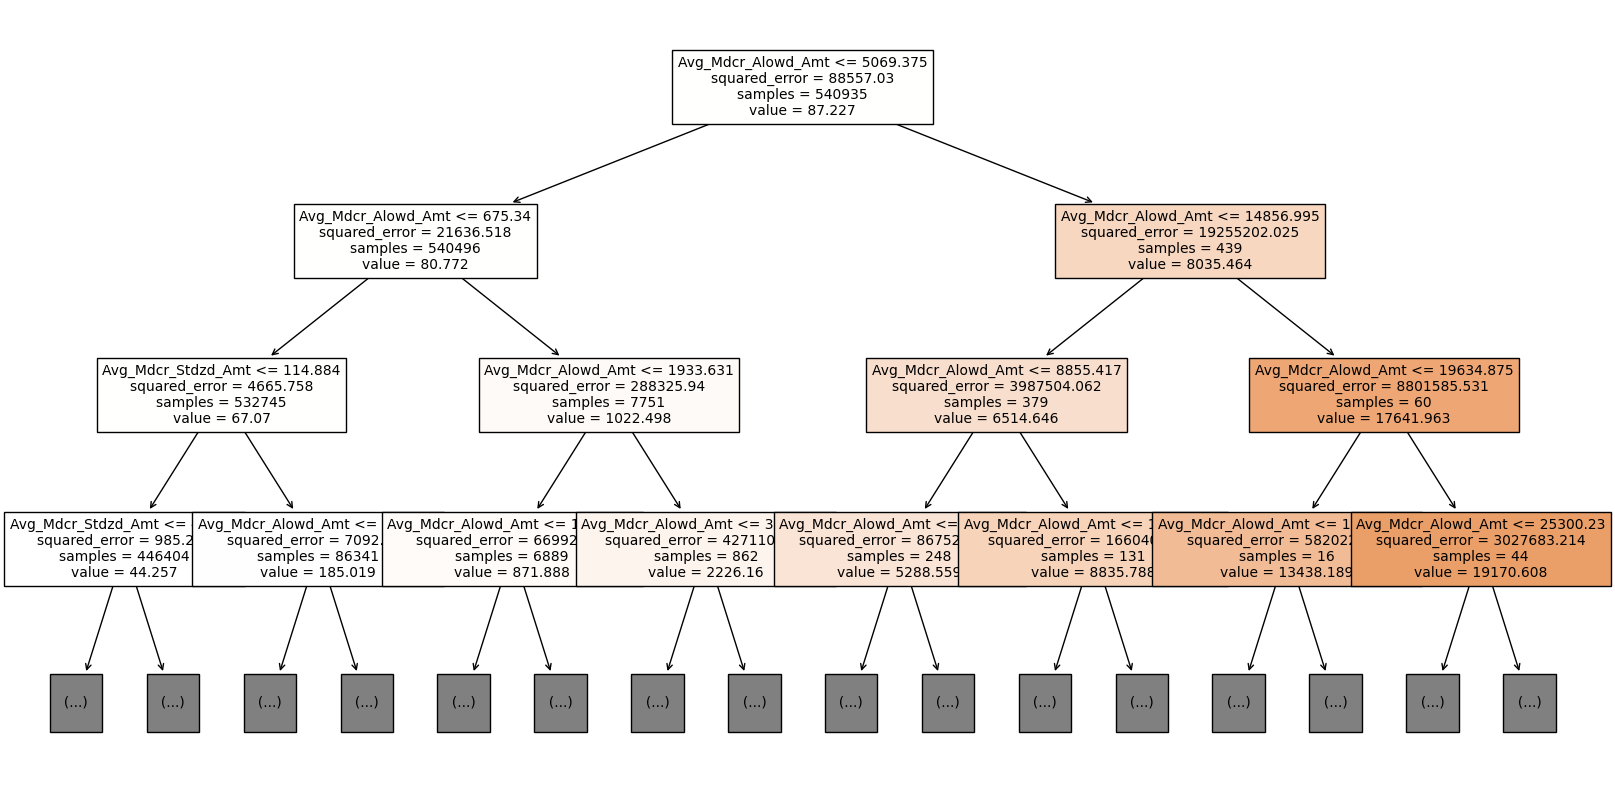

Fully Grown Decision Tree Metrics:

Mean Squared Error (MSE): 26.147277309896317
R-squared (R2) Score: 0.9997599039894045
Root Mean Squared Error (RMSE): 5.11344084838148
Mean Absolute Percentage Error (MAPE): 2.112741601818552 %


In [20]:
# Predict the target values using the validation set with the trained Regression Tree
y_pred_full_tree = RT.predict(valid_X)

# Visualize the top three levels of the decision tree to understand how the splits are made
plt.figure(figsize=(20, 10))
plot_tree(RT, filled=True, feature_names=train_X.columns.tolist(), max_depth=3, fontsize=10)
plt.show()

# Calculate performance metrics to evaluate the accuracy of the decision tree model
mse = mean_squared_error(valid_Y, y_pred_full_tree)  # Mean Squared Error
r2 = r2_score(valid_Y, y_pred_full_tree)  # R-squared, explains the variance ratio
rmse = np.sqrt(mse)  # Root Mean Squared Error, a more interpretable version of MSE
mape = np.mean(np.abs((valid_Y - y_pred_full_tree) / valid_Y)) * 100  # MAPE, indicating percentage error

# Display the calculated performance metrics
print("Fully Grown Decision Tree Metrics:\n")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")

# Compute residuals by subtracting the predictions from actual values
y_residuals_full_tree = valid_Y.reset_index(drop=True) - y_pred_full_tree


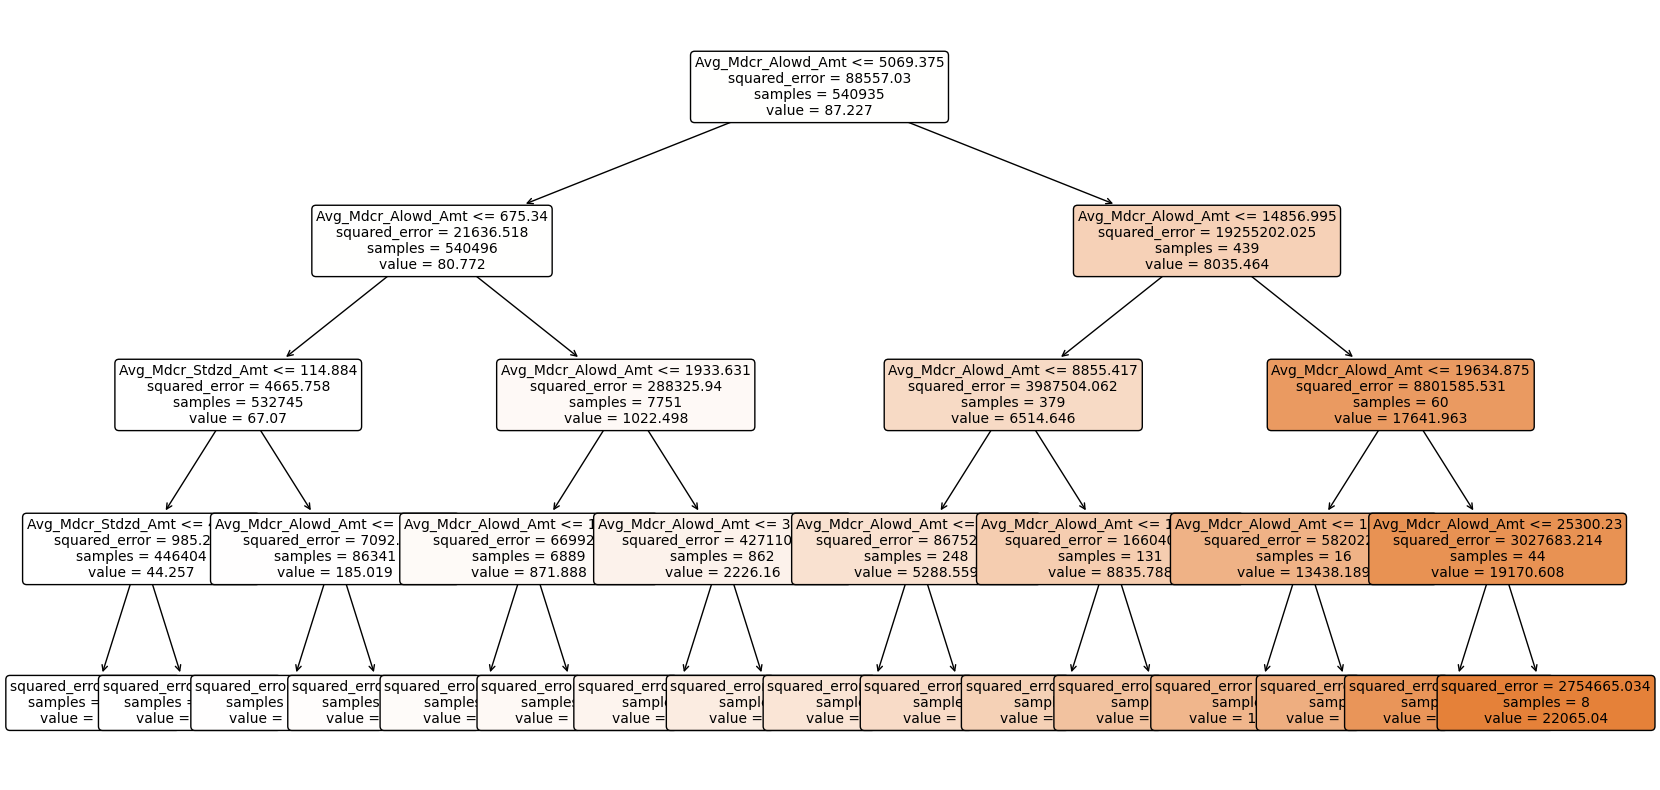

Pruned Decision Tree Metrics:
Mean Squared Error (MSE): 1270.1218233299437
R-squared (R2) Score: 0.9883371725806269
Root Mean Squared Error (RMSE): 35.63876854395987
Mean Absolute Percentage Error (MAPE): 673.7597090992887 %
Mean Absolute Error (MAE): 18.730075114047214
Mean Error (ME): -0.29147667185117554
Mean Percentage Error (MPE): -650.8249743454855 %


In [21]:
# Configure and initialize the pruned decision tree model with specified hyperparameters
pruned_tree_model = DecisionTreeRegressor(random_state=72,
                                          max_depth=4,
                                          min_samples_leaf=5,
                                          min_samples_split=10)
# Fit the pruned decision tree model to the training data
pruned_tree_model.fit(train_X, train_Y)

# Visualize the pruned decision tree to understand its structure
plt.figure(figsize=(20, 10))
plt.title("Pruned Regression Tree")
plot_tree(pruned_tree_model,
          filled=True,
          feature_names=X.columns,
          rounded=True,
          fontsize=10)
plt.show()

# Predict the validation set using the pruned tree
pruned_tree_y_pred = pruned_tree_model.predict(valid_X)

# Calculate various performance metrics to evaluate the model
pruned_tree_mse = mean_squared_error(valid_Y, pruned_tree_y_pred)  # Mean Squared Error
pruned_tree_r2 = r2_score(valid_Y, pruned_tree_y_pred)  # R-squared Score
pruned_tree_rmse = np.sqrt(pruned_tree_mse)  # Root Mean Squared Error
pruned_tree_mape = np.mean(np.abs((valid_Y - pruned_tree_y_pred) / valid_Y)) * 100  # Mean Absolute Percentage Error
pruned_tree_mae = mean_absolute_error(valid_Y, pruned_tree_y_pred)  # Mean Absolute Error
pruned_tree_me = np.mean(valid_Y - pruned_tree_y_pred)  # Mean Error
pruned_tree_mpe = np.mean((valid_Y - pruned_tree_y_pred) / valid_Y) * 100  # Mean Percentage Error

# Display the calculated metrics for evaluation
print("Pruned Decision Tree Metrics:")
print("Mean Squared Error (MSE):", pruned_tree_mse)
print("R-squared (R2) Score:", pruned_tree_r2)
print("Root Mean Squared Error (RMSE):", pruned_tree_rmse)
print("Mean Absolute Percentage Error (MAPE):", pruned_tree_mape, "%")
print("Mean Absolute Error (MAE):", pruned_tree_mae)
print("Mean Error (ME):", pruned_tree_me)
print("Mean Percentage Error (MPE):", pruned_tree_mpe, "%")

# Calculate residuals to analyze the discrepancies between predicted and actual values
Variable_y_residuals_pruned_tree = valid_Y.reset_index(drop=True) - pruned_tree_y_pred



---



**KNN**

---



In [22]:
#  KNN Regression
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(train_X, train_Y)

# Predicting the validation set
KNN_pred = knn_regressor.predict(valid_X)

# Creating a DataFrame to compare actual and predicted values
df_knn = pd.DataFrame({"Actual": valid_Y, "Predicted": KNN_pred})

print(df_knn.head(5))
print()

            Actual  Predicted
35316    39.135464  31.173217
358374   11.300833  37.335337
145651   72.297931  65.581778
108374    6.701053   6.271214
10352   128.960000  92.436296



In [23]:
# Computing regression metrics
mse = mean_squared_error(valid_Y, KNN_pred)
r2 = r2_score(valid_Y, KNN_pred)
mae = mean_absolute_error(valid_Y, KNN_pred)
regressionSummary(valid_Y, KNN_pred)


Regression statistics

                      Mean Error (ME) : 16.7065
       Root Mean Squared Error (RMSE) : 247.8193
            Mean Absolute Error (MAE) : 39.1617
          Mean Percentage Error (MPE) : -681.1486
Mean Absolute Percentage Error (MAPE) : 709.9466




---



**Bagging (Ensemble)**

---



In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

base_model = DecisionTreeRegressor()

bagging_regressor = BaggingRegressor(base_estimator=base_model, n_estimators=50, random_state=1)#Intiating Bagging regression model
bagging_regressor.fit(train_X, train_Y)

bagging_predictions = bagging_regressor.predict(valid_X)
print("Bagging RMSE:", np.sqrt(mean_squared_error(valid_Y, bagging_predictions)))

Bagging RMSE: 5.496714145292303


In [25]:
# Printing regression metrics
mse = mean_squared_error(valid_Y, bagging_predictions)
r2 = r2_score(valid_Y, bagging_predictions)
mae = mean_absolute_error(valid_Y, bagging_predictions)
regressionSummary(valid_Y, bagging_predictions)


Regression statistics

                      Mean Error (ME) : 0.0050
       Root Mean Squared Error (RMSE) : 5.4967
            Mean Absolute Error (MAE) : 1.1297
          Mean Percentage Error (MPE) : -0.1472
Mean Absolute Percentage Error (MAPE) : 1.6598




---



**Boosting**

---



In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
gbr.fit(train_X, train_Y)

# Predicting the validation set
pred_boo = gbr.predict(valid_X)
# Creating a DataFrame to compare actual and predicted values
df_boo = pd.DataFrame({"Actual": valid_Y, "Predicted": pred_boo})
print(df_boo.head(5))
print()

            Actual   Predicted
35316    39.135464   38.533258
358374   11.300833   12.615777
145651   72.297931   75.500629
108374    6.701053    6.978876
10352   128.960000  128.878447



In [27]:
# Evaluation
mse = mean_squared_error(valid_Y, pred_boo)
r2 = r2_score(valid_Y, pred_boo)
mae = mean_absolute_error(valid_Y, pred_boo)
regressionSummary(valid_Y, pred_boo)


Regression statistics

                      Mean Error (ME) : -0.0051
       Root Mean Squared Error (RMSE) : 6.3037
            Mean Absolute Error (MAE) : 2.7812
          Mean Percentage Error (MPE) : -28.8604
Mean Absolute Percentage Error (MAPE) : 32.4714




---



**Random Forest**

---



In [28]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators=30, max_depth=2, random_state=1, max_features='sqrt')
random_forest_regressor.fit(train_X, train_Y)

forest_predictions = random_forest_regressor.predict(valid_X)
df_for = pd.DataFrame({"Actual": valid_Y, "Predicted": forest_predictions})
print(df_for.head(5))

            Actual  Predicted
35316    39.135464  72.427395
358374   11.300833  71.505243
145651   72.297931  80.143658
108374    6.701053  82.399593
10352   128.960000  71.063798


In [29]:
# Evaluation
mse = mean_squared_error(valid_Y, forest_predictions)
r2 = r2_score(valid_Y, forest_predictions)
mae = mean_absolute_error(valid_Y, forest_predictions)
regressionSummary(valid_Y, forest_predictions)


Regression statistics

                      Mean Error (ME) : 0.6752
       Root Mean Squared Error (RMSE) : 166.8044
            Mean Absolute Error (MAE) : 60.3180
          Mean Percentage Error (MPE) : -2461.4537
Mean Absolute Percentage Error (MAPE) : 2484.5901




---



**Neural Networks**

---



In [30]:
nnr = MLPRegressor(hidden_layer_sizes = (6,8,3,15),
                   activation = 'relu', solver = 'adam',
                   max_iter = 500, learning_rate="adaptive",
                   learning_rate_init=0.05, warm_start=True)

model = nnr.fit(train_X, train_Y)

predictions = model.predict(valid_X)
print(predictions)

[91.22283343 91.22283343 91.22283343 ... 91.22283343 91.22283343
 91.22283343]


In [31]:
regressionSummary(valid_Y,predictions)


Regression statistics

                      Mean Error (ME) : -2.4082
       Root Mean Squared Error (RMSE) : 330.0140
            Mean Absolute Error (MAE) : 76.7734
          Mean Percentage Error (MPE) : -2985.1741
Mean Absolute Percentage Error (MAPE) : 3003.5764




---



**Random Forest - Pyspark**

---



In [32]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 988.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=22af45c091b497dc27d3a1be77a9a16c9648ce2e76816e1481c834480ab70c04
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [33]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [34]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Medical").getOrCreate()

In [35]:
medical='Medicare_data.csv'
med = spark.read.csv(medical, header = True, inferSchema = True)
med.show()

+----------+--------------------------+-----------------------+---------------+--------------------+-----------------+-------------------+------------------+----------------+-----------------+-------------------------+-----------------------+-----------------+-----------------+----------------------+------------------+-------------------+-----------------------------+--------+--------------------+--------------+-------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+
|Rndrng_NPI|Rndrng_Prvdr_Last_Org_Name|Rndrng_Prvdr_First_Name|Rndrng_Prvdr_MI|Rndrng_Prvdr_Crdntls|Rndrng_Prvdr_Gndr|Rndrng_Prvdr_Ent_Cd|  Rndrng_Prvdr_St1|Rndrng_Prvdr_St2|Rndrng_Prvdr_City|Rndrng_Prvdr_State_Abrvtn|Rndrng_Prvdr_State_FIPS|Rndrng_Prvdr_Zip5|Rndrng_Prvdr_RUCA|Rndrng_Prvdr_RUCA_Desc|Rndrng_Prvdr_Cntry|  Rndrng_Prvdr_Type|Rndrng_Prvdr_Mdcr_Prtcptg_Ind|HCPCS_Cd|          HCPCS_Desc|HCPCS_Drug_Ind|Place_Of_Srvc|Tot_Benes|Tot_Srvcs|Tot_Bene_Da

In [36]:
X=med.drop('Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name','Rndrng_Prvdr_MI','Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_State_FIPS',
                         'Rndrng_Prvdr_Zip5','HCPCS_Cd','Place_Of_Srvc','HCPCS_Drug_Ind','Rndrng_Prvdr_St2','Rndrng_Prvdr_Crdntls','Rndrng_Prvdr_Ent_Cd','Rndrng_Prvdr_Gndr','Rndrng_Prvdr_Mdcr_Prtcptg_Ind','HCPCS_Desc','Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry',
                          'Rndrng_Prvdr_Type','Rndrng_Prvdr_St1')
X.show()

+----------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+
|Rndrng_NPI|Rndrng_Prvdr_RUCA|Tot_Benes|Tot_Srvcs|Tot_Bene_Day_Srvcs|Avg_Sbmtd_Chrg|Avg_Mdcr_Alowd_Amt|Avg_Mdcr_Pymt_Amt|Avg_Mdcr_Stdzd_Amt|
+----------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+
|1003000738|              1.0|       65|     75.0|                74|         312.0|           62.2664|     46.875333333|            44.976|
|1003000738|              1.0|       50|     56.0|                56|  453.03571429|      98.248928571|     75.074107143|      71.862857143|
|1003000738|              1.0|       13|     13.0|                13|  1703.1538462|      32.933846154|     26.343076923|      21.044615385|
|1003000738|              1.0|       21|     21.0|                21|  3213.2142857|      148.89380952|     119.11714286|      76.564285714|
|1003000738| 

In [37]:
# Handle null values by dropping rows with nulls
X = X.dropna()

# Assemble the vector
assembler = VectorAssembler(
    inputCols=["Rndrng_NPI", "Rndrng_Prvdr_RUCA", "Tot_Benes", "Tot_Srvcs", "Tot_Bene_Day_Srvcs", "Avg_Sbmtd_Chrg",
               "Avg_Mdcr_Alowd_Amt", "Avg_Mdcr_Pymt_Amt", "Avg_Mdcr_Stdzd_Amt"],
    outputCol="features"
)
data = assembler.transform(X)

# Train-test split
train, test = data.randomSplit([0.8, 0.2])
data.show()


+----------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+--------------------+
|Rndrng_NPI|Rndrng_Prvdr_RUCA|Tot_Benes|Tot_Srvcs|Tot_Bene_Day_Srvcs|Avg_Sbmtd_Chrg|Avg_Mdcr_Alowd_Amt|Avg_Mdcr_Pymt_Amt|Avg_Mdcr_Stdzd_Amt|            features|
+----------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+--------------------+
|1003000738|              1.0|       65|     75.0|                74|         312.0|           62.2664|     46.875333333|            44.976|[1.003000738E9,1....|
|1003000738|              1.0|       50|     56.0|                56|  453.03571429|      98.248928571|     75.074107143|      71.862857143|[1.003000738E9,1....|
|1003000738|              1.0|       13|     13.0|                13|  1703.1538462|      32.933846154|     26.343076923|      21.044615385|[1.003000738E9,1....|
|1003000738|              1.

In [38]:
# Print the train data description
print(train.describe().show())

+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|         Rndrng_NPI| Rndrng_Prvdr_RUCA|         Tot_Benes|         Tot_Srvcs|Tot_Bene_Day_Srvcs|    Avg_Sbmtd_Chrg|Avg_Mdcr_Alowd_Amt| Avg_Mdcr_Pymt_Amt|Avg_Mdcr_Stdzd_Amt|
+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|             541532|            541532|            541532|            541532|            541532|            541532|            541532|            541532|            541532|
|   mean|1.497844133063708E9| 1.369002016501195| 92.50157331422704| 272.8344819881372|144.01411735594573|  452.379172356854|110.92556631847121| 87.66526822320978|  87.8090454349124|
| stddev|2.870497518698617E8|1.8212006508769665|1255.8900715795908|3659.8170650639818| 207

In [39]:
from pyspark.ml.regression import RandomForestRegressor

In [40]:
rf = RandomForestRegressor(labelCol = "Avg_Mdcr_Pymt_Amt", featuresCol = "features", numTrees = 10)

In [41]:
model = rf.fit(train)

In [42]:
preds = model.transform(test)

In [43]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col, udf

# Calculating the metrics
RMSE = RegressionEvaluator(predictionCol = "prediction", labelCol = "Avg_Mdcr_Pymt_Amt", metricName = "rmse")
print("RMSE: ", RMSE.evaluate(preds))

MSE = RegressionEvaluator(predictionCol = "prediction", labelCol = "Avg_Mdcr_Pymt_Amt", metricName = "mse")
print("MSE: ", MSE.evaluate(preds))


MAE = RegressionEvaluator(predictionCol = "prediction", labelCol = "Avg_Mdcr_Pymt_Amt", metricName = "mae")
print("MAE: ", MAE.evaluate(preds))

RMSE:  232.94798280927893
MSE:  54264.762694912104
MAE:  20.82273201061661


In [44]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType

# Define UDF for Mean Error (ME)
def mean_error(actual, prediction):
    return actual - prediction

mean_error_udf = udf(mean_error, DoubleType())

# Adding a new column for mean error calculations
preds = preds.withColumn("mean_error", mean_error_udf(col("Avg_Mdcr_Pymt_Amt"), col("prediction")))

# Calculating the average of mean errors (ME)
me = preds.selectExpr("avg(mean_error)").collect()[0][0]
print("Mean Error (ME):", me)

# Define UDF for Mean Absolute Percentage Error (MAPE)
def mape(actual, prediction):
    return abs((actual - prediction) / actual) * 100

mape_udf = udf(mape, DoubleType())

# Adding a new column for MAPE calculations
preds = preds.withColumn("mape", mape_udf(col("Avg_Mdcr_Pymt_Amt"), col("prediction")))

# Calculating the average of MAPE
mape_avg = preds.selectExpr("avg(mape)").collect()[0][0]
print("Mean Absolute Percentage Error (MAPE):", mape_avg)


Mean Error (ME): -1.194482888538282
Mean Absolute Percentage Error (MAPE): 338.3807438584451


In [45]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType

# Define a UDF for Mean Percentage Error (MPE)
def mean_percentage_error(actual, prediction):
    return (actual - prediction) / actual * 100

mpe_udf = udf(mean_percentage_error, DoubleType())

# Adding a new column for MPE calculations
preds = preds.withColumn("mpe", mpe_udf(col("Avg_Mdcr_Pymt_Amt"), col("prediction")))

# Calculating the average of MPE
mpe_avg = preds.selectExpr("avg(mpe)").collect()[0][0]
print("Mean Percentage Error (MPE):", mpe_avg)

Mean Percentage Error (MPE): -331.96406691843856


In [46]:
import pickle
pickle.dump(bagging_regressor, open('bagging_model.pkl', 'wb'))

In [47]:
import numpy as np

# Function to load the model and make predictions
def load_and_predict(features):
    # Load the saved model
    model = pickle.load(open('bagging_model.pkl', 'rb'))
    # Make predictions
    prediction = model.predict(np.array([features]))
    return prediction

# Example usage
test_features = valid_X.iloc[0]  # Assuming you want to test with the first row of your test set
predicted_value = load_and_predict(test_features)
print("Predicted Value:", predicted_value)

Predicted Value: [38.8412164]


In [48]:
# Simulate real-time predictions for 100 samples from the test set
count = 0
for index, row in valid_X.iterrows():
    pred = load_and_predict(row)
    print(f"Prediction for index {index}: {pred}")
    count += 1  # Increment the counter with each iteration
    if count == 100:  # Stop after 100 predictions
        break

Prediction for index 35316: [38.8412164]
Prediction for index 358374: [11.30019253]
Prediction for index 145651: [72.57525965]
Prediction for index 108374: [6.73277939]
Prediction for index 10352: [128.96]
Prediction for index 375489: [10.5]
Prediction for index 659777: [29.19885821]
Prediction for index 443903: [77.17441258]
Prediction for index 206221: [25.32869962]
Prediction for index 578814: [55.88494158]
Prediction for index 197728: [157.57811348]
Prediction for index 634619: [83.36691249]
Prediction for index 8538: [62.83669483]
Prediction for index 305719: [67.68367141]
Prediction for index 556749: [135.54047343]
Prediction for index 295624: [5.78]
Prediction for index 32908: [61.5589428]
Prediction for index 58765: [193.18034101]
Prediction for index 45393: [782.04062957]
Prediction for index 156372: [16.53]
Prediction for index 177782: [6.56956663]
Prediction for index 201024: [142.43502799]
Prediction for index 402198: [149.94494411]
Prediction for index 590844: [93.66126645

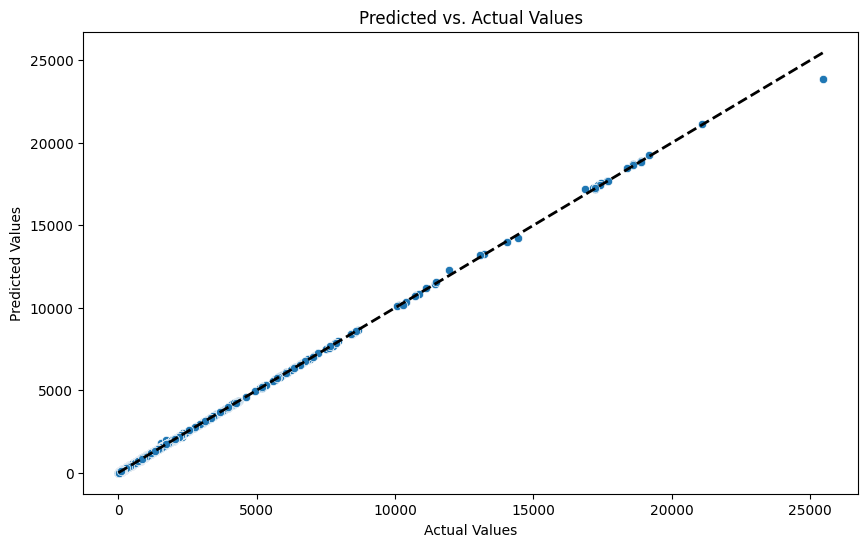

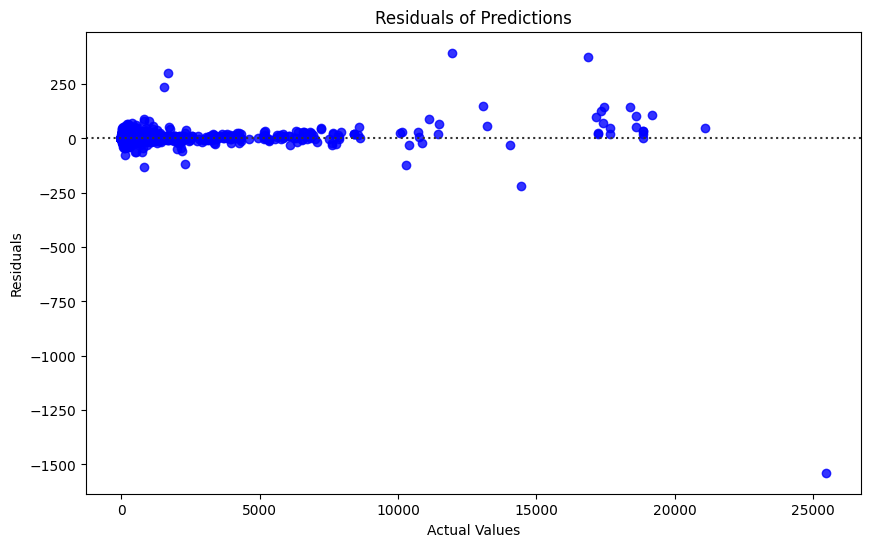

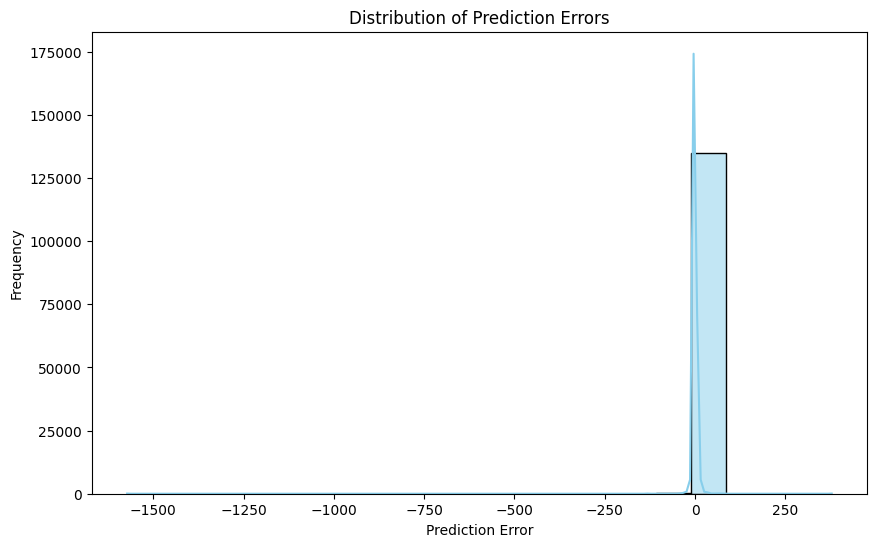

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a DataFrame from predictions and actual values
pred_df = pd.DataFrame({
    'Predicted': bagging_predictions,
    'Actual': valid_Y
}).reset_index()

# Scatter Plot of Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=pred_df)
plt.plot([pred_df['Actual'].min(), pred_df['Actual'].max()], [pred_df['Actual'].min(), pred_df['Actual'].max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual', y='Predicted', data=pred_df, color="blue")
plt.title('Residuals of Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

# Histogram of Prediction Errors
errors = pred_df['Predicted'] - pred_df['Actual']
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=20, color='skyblue')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()